Co-occurance
1. 3 co-occurrence plots next to each other
    - [ ] Use default colouring
    - [ ] For maybe 5 sizes
    - [ ] Do 1 version without any clustering
    - [ ] Do 1 other version with clustering using 2000 runs
    - [ ] Use entire set, not only training data

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [3]:
samples_path = '../OUTPUT/sample_sizes/'
fname = 'MCMs_'

In [4]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
# sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 10
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




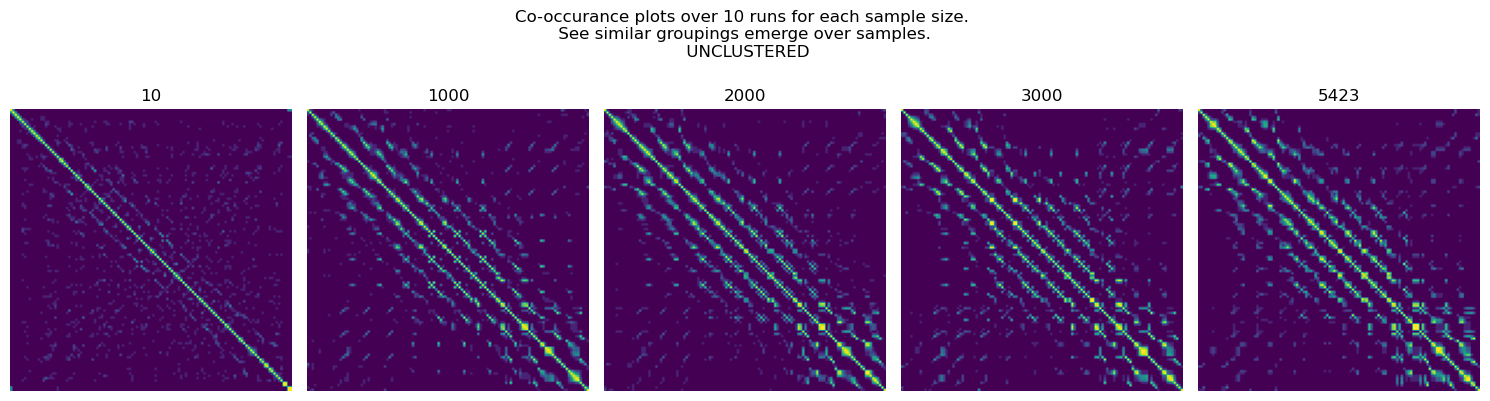

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.imshow(coo_sum[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n UNCLUSTERED")
plt.savefig("../figures/co-occurance_noclust2k.png", dpi=300, bbox_inches="tight")


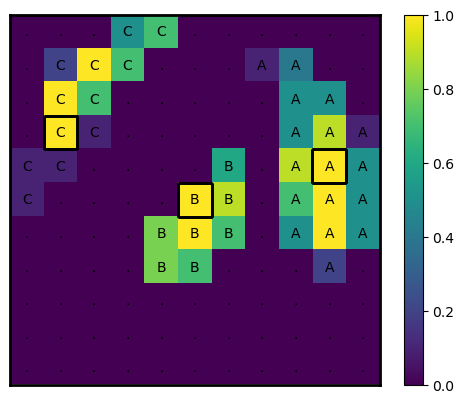

In [6]:
mcms_5k = mcm_all_com[-1]
digit = 0

interesting_pix = [34,60,53]

def interesting_pix_map(mcms_ss, interesting_pix, nr_runs, digit, ax, map_kwargs={}):
    # borders around selected pixels
    b = np.zeros(121)
    b[interesting_pix] = 1
    b = b.reshape((11,11))
    b = myplot.find_borders(b)

    icc_loc = np.zeros((11,11))
    icc_sum = np.zeros((11,11))

    for pixel_idx in interesting_pix:
        row_i = pixel_idx // 11
        col_i = pixel_idx % 11
        for mcms in mcms_ss:
            comm = myplot.generate_icc_comms_map(mcms[digit])
            icc_sum += np.where(comm==comm[row_i,col_i], 1,0)
        icc_loc += np.where(icc_sum>0,1,0).astype(int)

        

    letters = myplot.int_to_letters(icc_loc.astype(int),first_ascii = 64)
    letters[letters == "@"] = "."
    myplot.partition_map(ax, icc_sum/nr_runs,letters, b,cmap="viridis", normalise=False, **map_kwargs)

interesting_pix_map(mcms_5k, interesting_pix, nr_runs, digit=0,ax = plt.gca())


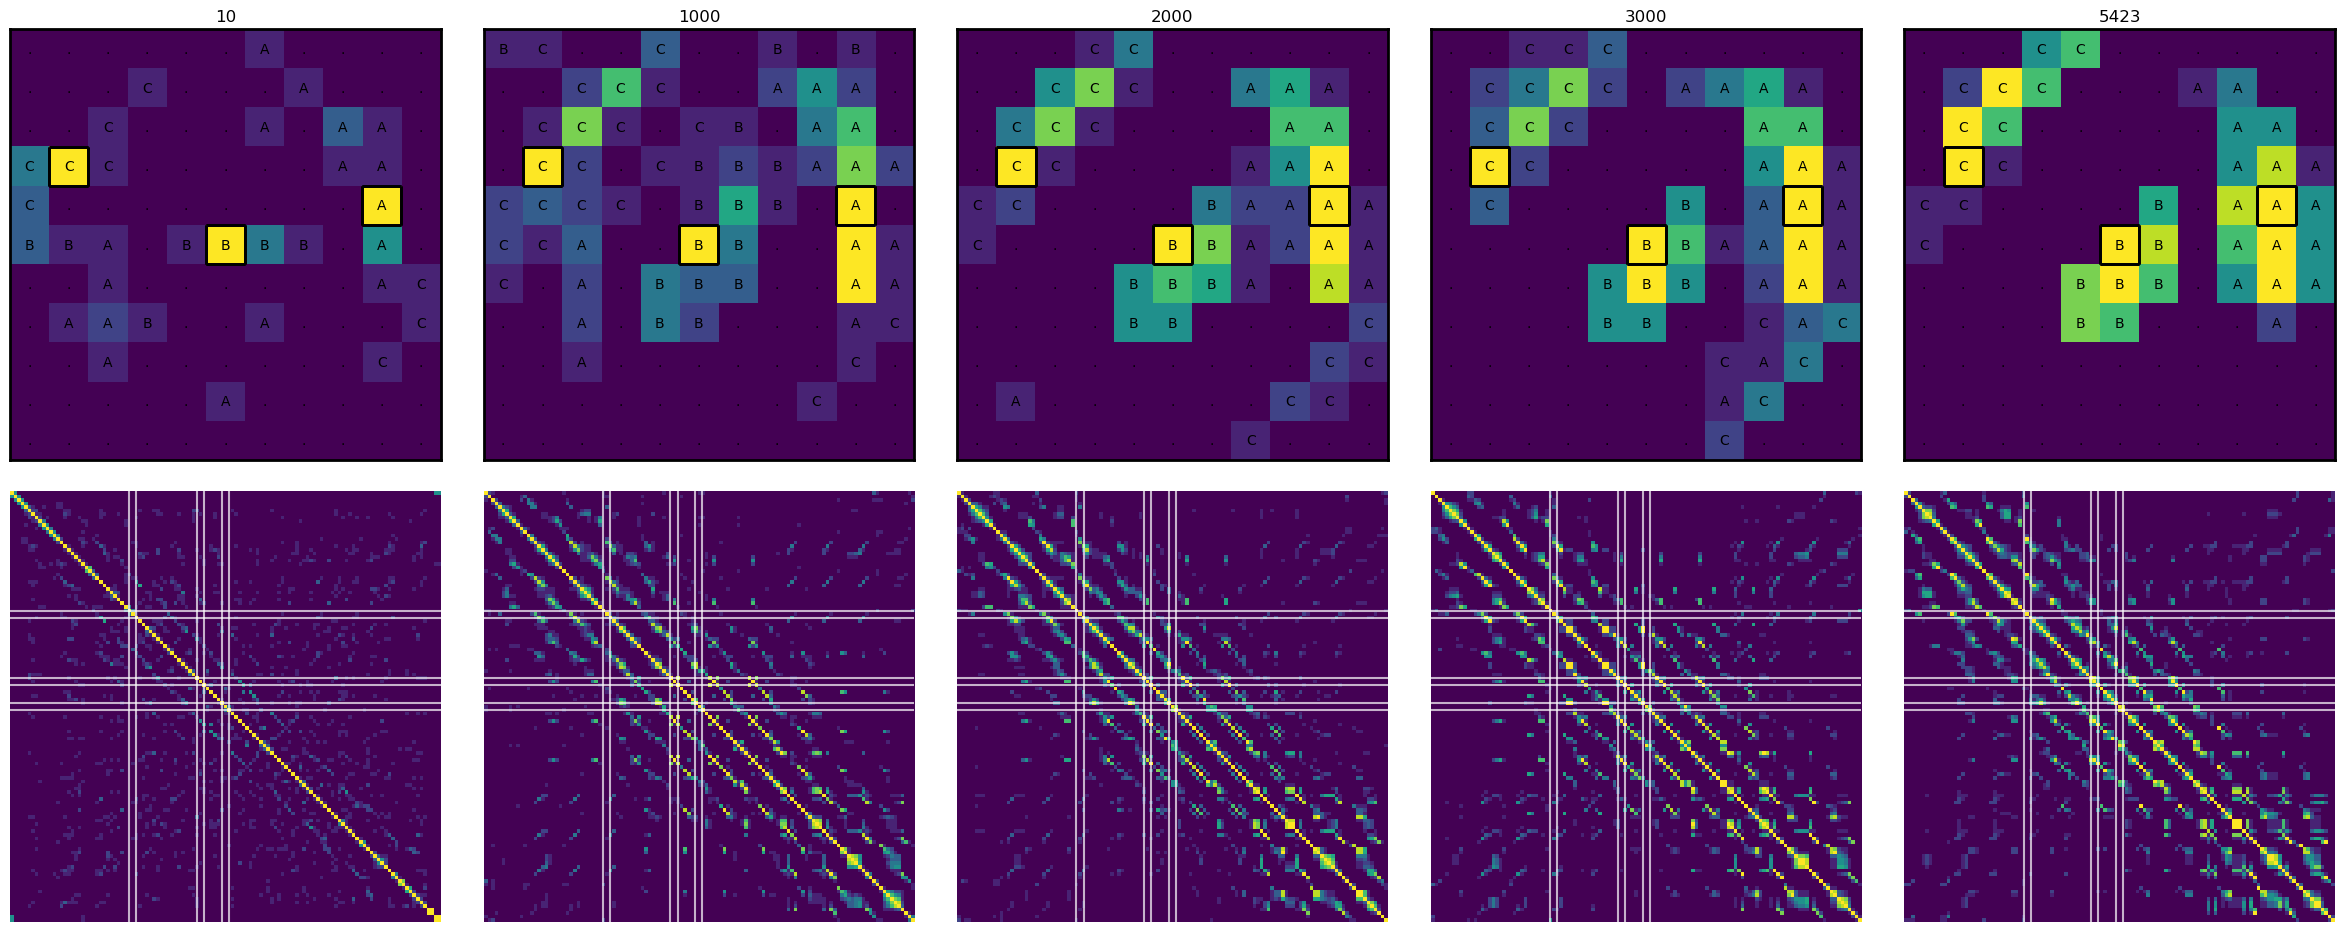

In [7]:
digit = 0

interesting_pix = [34,60,53]
# interesting_pix = [103]

scale = 2
fig, axs = plt.subplots(2, 5, figsize=(scale*15, scale*6), gridspec_kw = {'wspace':0.1, 'hspace':0})


axs = axs.flatten()

for i, ax in enumerate(axs[:5]):
    interesting_pix_map(mcm_all_com[i], interesting_pix, nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'{sample_sizes[i]}')
    # ax.imshow(coo_sum[i,:,:], cmap='viridis')
    # ax.axis('off')

    # ax.set_title(f'{sample_sizes[i]}')

colors = ["red", "orange", "yellow","green"]
for i, ax in enumerate(axs[5:]):
    ax.imshow(coo_sum[i,:,:], cmap='viridis')
    for j, pixel_idx in enumerate(interesting_pix):


        ax.axhline(pixel_idx+1, color= "white",alpha=.7) 
        ax.axhline(pixel_idx-1, color= "white",alpha=.7) 

        ax.axvline(pixel_idx+1, color= "white",alpha=.7)  
        ax.axvline(pixel_idx-1, color= "white",alpha=.7)  

    ax.axis('off')



# fig.subplots_adjust(hspace=)
# plt.tight_layout()
# plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n UNCLUSTERED")
# plt.savefig("../figures/co-occurance_noclust2k.png", dpi=300, bbox_inches="tight")


# separate plots

0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1


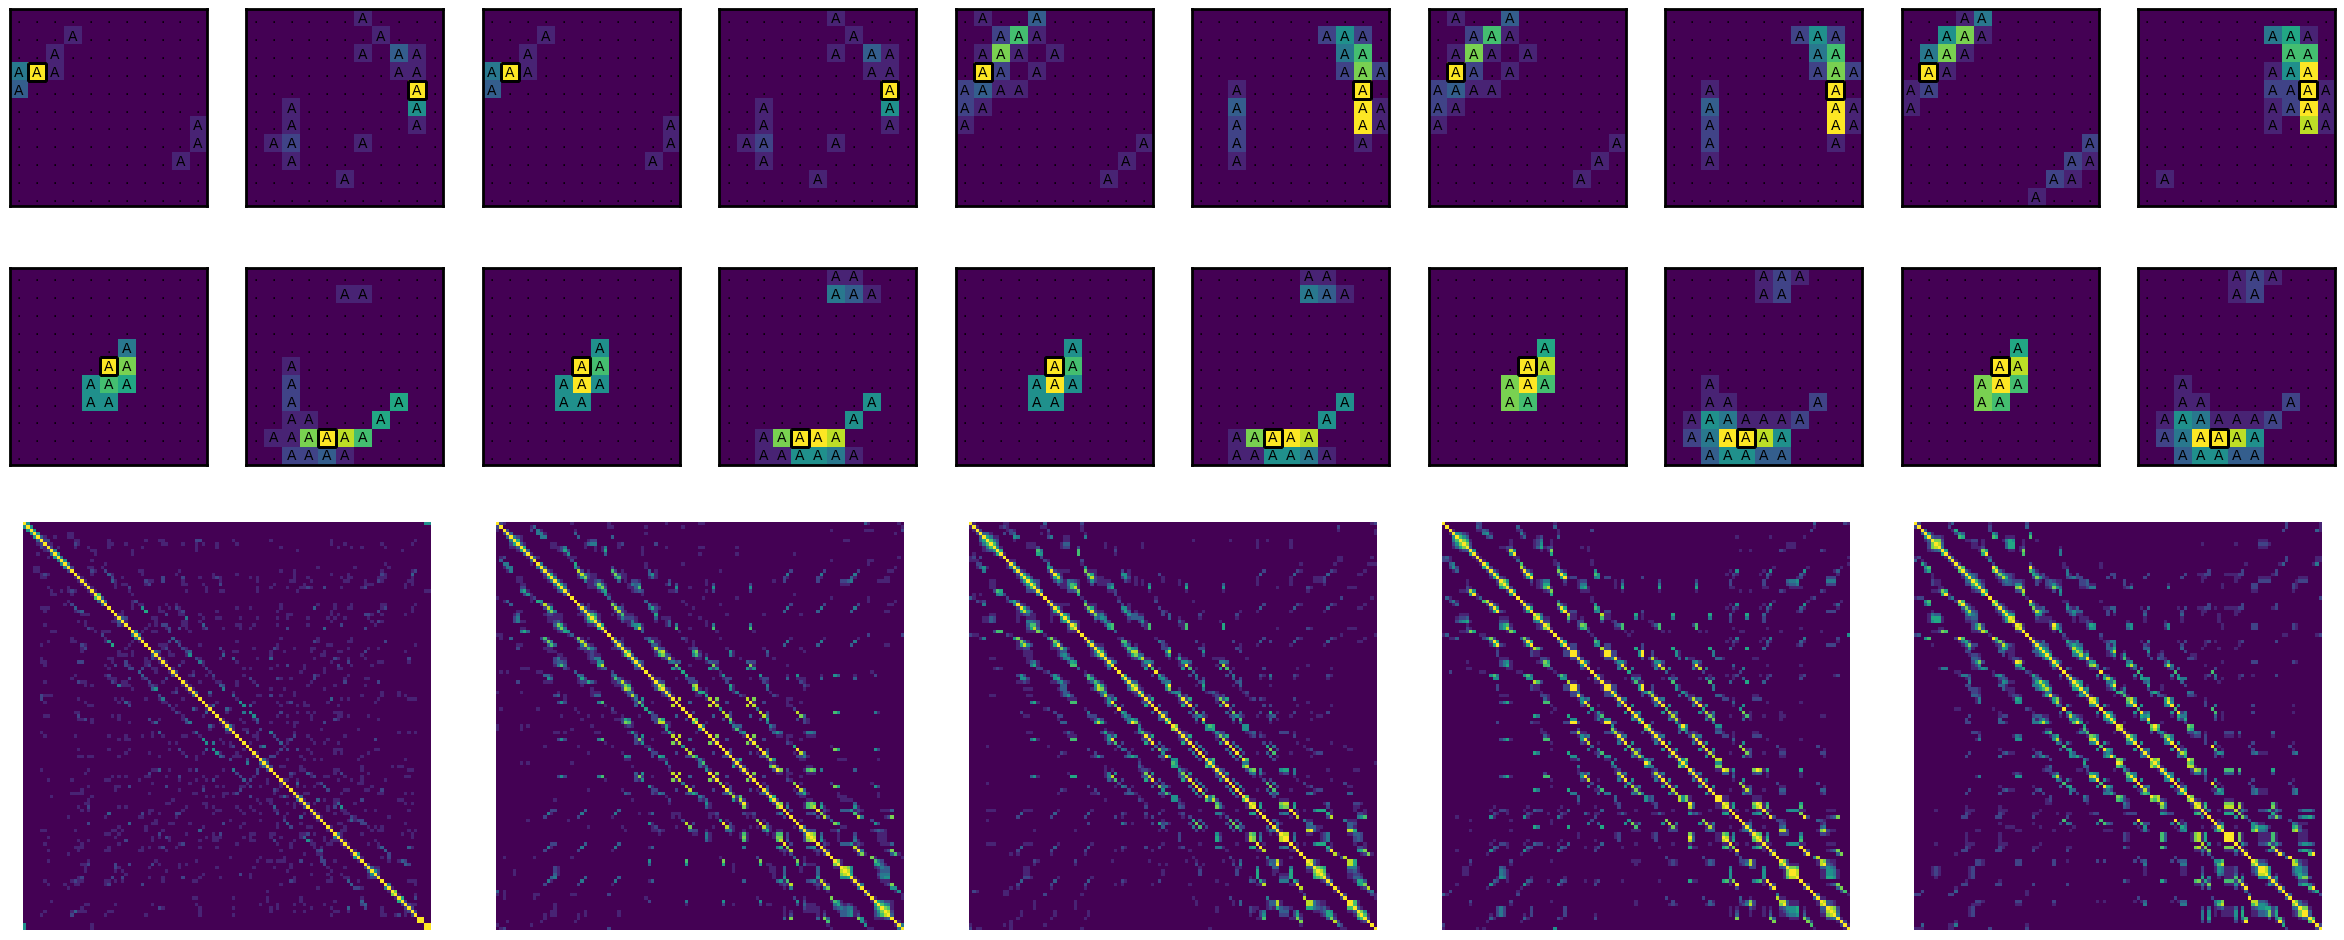

In [88]:
from matplotlib import gridspec



scale = 2
n_col = 10
n_row = 3

# generate grid
fig = plt.figure(figsize=(scale*15, scale*6)) 
gs = gridspec.GridSpec(nrows=n_row, ncols=n_col, height_ratios=[1,1, 2],width_ratios=[1]*n_col)
axs = []
for r in range(3):
    for c in range(n_col):
        gs0 = gs[0].subgridspec(r+1, c+1, wspace=0, hspace=0)
for n in range(n_col):
    ax1 = fig.add_subplot(gs[0,n])
    axs.append(ax1)
for n in range(n_col):
    ax1 = fig.add_subplot(gs[1,n])
    axs.append(ax1)
for n in range(int(n_col//2)):
    ax = fig.add_subplot(gs[2,n*2:(n*2)+2])
    axs.append(ax)

# fill with data
interesting_pix = [[34,60],[53,103]]
# interesting_pix = [103]

# parition maps
upper_axs = axs[:n_col*(n_row-1)]
for i, ax in enumerate(upper_axs):
    j = i // n_col

    print(i%2, j)
    interesting_pix_map(mcm_all_com[int(i//4)], [interesting_pix[i%2][j]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    # ax.set_title(f'{sample_sizes[i]}')

# co-occurance matrices
lower_axs = axs[(n_row-1)*n_col:]
colors = ["red", "orange", "yellow","green"]
for i, ax in enumerate(lower_axs):
    ax.imshow(coo_sum[i,:,:], cmap='viridis')
    for j, pixel_idx in enumerate(interesting_pix):

        pass
        # ax.axhline(pixel_idx+1, color= "white",alpha=.7) 
        # ax.axhline(pixel_idx-1, color= "white",alpha=.7) 

        # ax.axvline(pixel_idx+1, color= "white",alpha=.7)  
        # ax.axvline(pixel_idx-1, color= "white",alpha=.7)  
    ax.axis("off")





In [62]:
def custom_walker(arr):
  n_row, n_col = arr.shape  # Get the dimensions of the array
  for i in range(n_row):
    for j in range(n_col):
      yield arr[i, j]  # Yield the element at (i, j)
      yield arr[i, (j + 1) % n_col]  # Yield the element in the same row, but with a wrapped-around column index

# Example usage
arr = np.arange(4).reshape(2, 2)  # Create a 2D array with shape (2, 2)
for x in custom_walker(arr.copy()):
  print(x)


0
1
1
0
2
3
3
2


In [9]:
len(axs)

25

NameError: name 'comm' is not defined

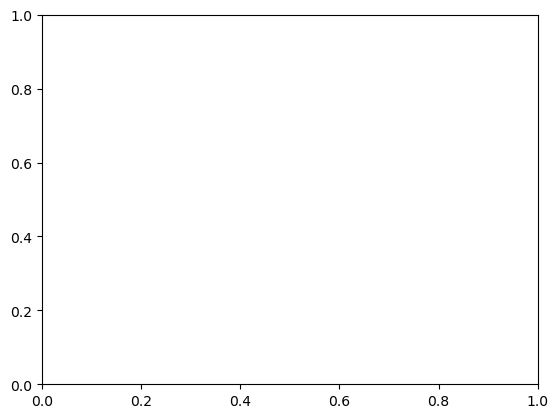

In [10]:
myplot.partition_map(plt.gca(), comm,np.arange(121).reshape((11,11)), None)

In [ ]:
coo_clust = np.empty(coo_sum.shape)
for i, coo in enumerate(coo_sum):
    coo_clust[i,:,:] = myplot.do_cluster(coo, coo_sum[2,:,:])

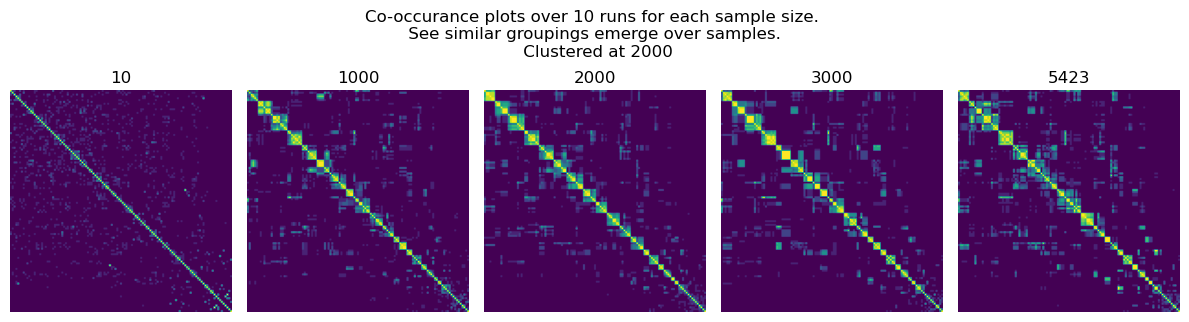

In [ ]:
scale = 1
fig, axs = plt.subplots(1, 5, figsize=(12*scale, 4*scale))

for i, ax in enumerate(axs):
    ax.imshow(coo_clust[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n Clustered at 2000")
plt.savefig("../figures/co-occurance_clust2k.png", dpi=300, bbox_inches="tight")


In [ ]:
out_filename_format

NameError: name 'out_filename_format' is not defined